# Lab Segmentation 1

In [106]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


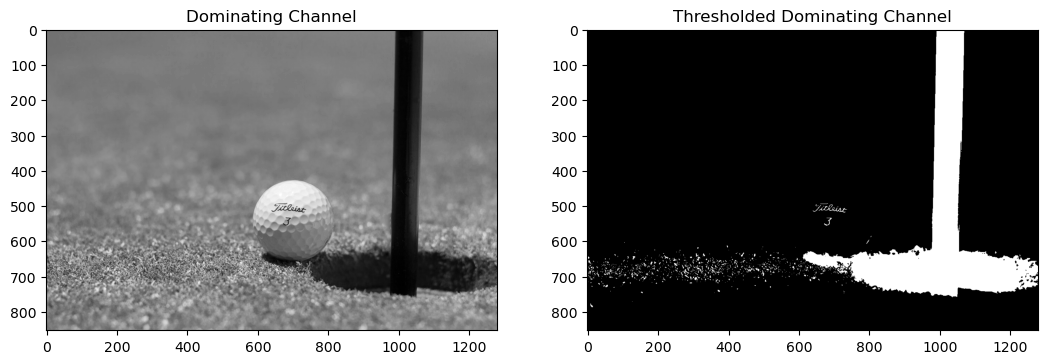

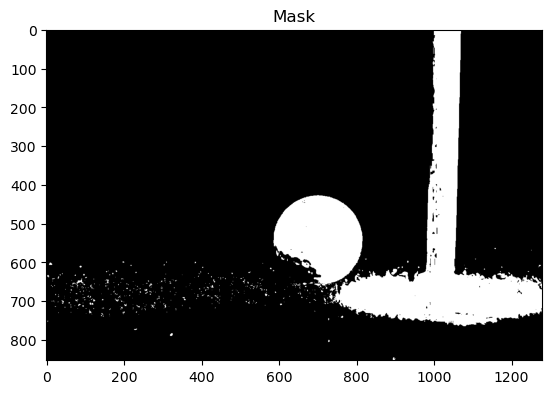

In [107]:
## For all requirements: The quality of the results is evaluated.

# 1- Read the image 
# [VERY IMPORTANT] and convert it to float: image = image.astype(float)
# read image golf

img = io.imread('imgs/exp1/golf.jpeg')
img = img.astype(float)

# 2- Retreive the 3 channels of the image(R,G,B) (will be used in the coming steps)
R = img[:,:,0]
G = img[:,:,1]
B = img[:,:,2]
# print(R)
# print(G)
# print(B)
# show_images([R,G,B],['R','G','B'])

# 3- Visually (not by code) detect the dominating color channel (C) for the backgroung (R, G or B)
C = G

# 4- Draw the dominating channel (r, g or b) thresholded by some threshold (to make sure your choice is meaningful)
C_thresholded = C < 80
show_images([C, C_thresholded],['Dominating Channel', 'Thresholded Dominating Channel'])

# 5- Get an intuitive way(There is a very simple way) to make a mask that can get the pixels where the values of the dominating channels 
# have larger values than the other channels with an appropriate threshold

mask  = np.ones(C.shape)
mask[(C > R) & (C > B)] = 0
# mask = (C > R) & (C > B)

# 6- display the binarized image
show_images([mask],['Mask'])






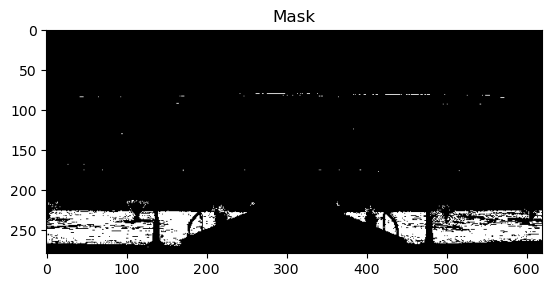

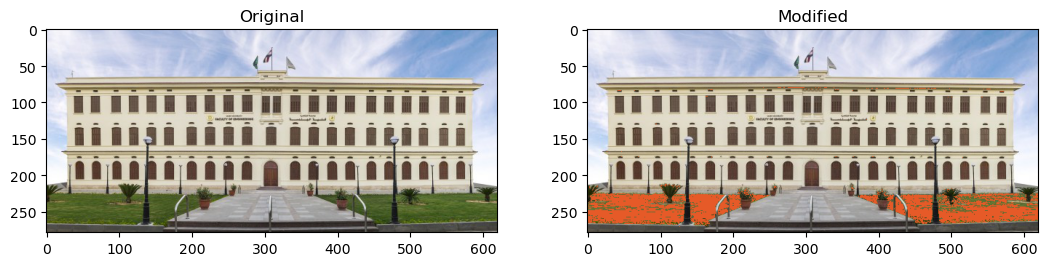

In [108]:
# 1- Get the required RGB color (Using a color picker)
r = 72
g = 90
b = 30

# 2- Read image
img_orig = io.imread('imgs/exp2/cufe.png')
img = img_orig.astype(float)

# 3- extract R, G and B channels (as float)
R = img[:,:,0]
G = img[:,:,1]
B = img[:,:,2]

# 4- calculate differences FOR EACH CHANNEL (between the image and the required pixel value)
diff_R = R - r
diff_G = G - g
diff_B = B - b

# 5- calculate overall distance from the given RGB color (use any appropriate distance measure, take care of the minus distances)
dist = np.sqrt(diff_R**2 + diff_G**2 + diff_B**2) 
# show_images([dist],['Distance'])
# print (dist)

# 6-  create a mask by thresholding the differences
mask = dist < 28
show_images([mask],['Mask'])

# 7- In the input image, Replace the pixels of the mask with the following color
# R = 230 , G = 90 , B=40
new_img = img_orig.copy()
new_img[mask] = [230,90,40]

# 8- show the image or save it
show_images([img_orig,new_img],['Original','Modified'])
